In [1]:
import pandas as pd

# Load the CSV file

data = pd.read_csv("MarketPricePrediction.csv")

# Display the first few rows of the dataset
data.head()


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [2]:
# Display data types and basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [3]:
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [4]:
# Display summary statistics
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [5]:
# Display the column names
print(data.columns)


Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')


In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Check if the columns exist and encode the categorical columns
if 'market' in data.columns:
    data['market_encoded'] = le.fit_transform(data['market'])
    data = data.drop(columns=['market'])
    
if 'state' in data.columns:
    data['state_encoded'] = le.fit_transform(data['state'])
    data = data.drop(columns=['state'])
    
if 'city' in data.columns:
    data['city_encoded'] = le.fit_transform(data['city'])
    data = data.drop(columns=['city'])

if 'month' in data.columns:
    data['month_encoded'] = le.fit_transform(data['month'])
    data = data.drop(columns=['month'])


In [7]:
# Ensure date column is in datetime format
data['date'] = pd.to_datetime(data['date'], format='%B-%Y')

# Set the date column as the index
data.set_index('date', inplace=True)
data

,year,quantity,priceMin,priceMax,priceMod,market_encoded,state_encoded,city_encoded,month_encoded
date,,,,,,,,,
2005-01-01,2005,2350,404,493,446,0,16,0,4
2006-01-01,2006,900,487,638,563,0,16,0,4
2010-01-01,2010,790,1283,1592,1460,0,16,0,4
2011-01-01,2011,245,3067,3750,3433,0,16,0,4
2012-01-01,2012,1035,523,686,605,0,16,0,4
...,...,...,...,...,...,...,...,...,...
2011-12-01,2011,131326,282,612,526,119,14,116,2
2012-12-01,2012,207066,485,1327,1136,119,14,116,2
2013-12-01,2013,215883,472,1427,1177,119,14,116,2


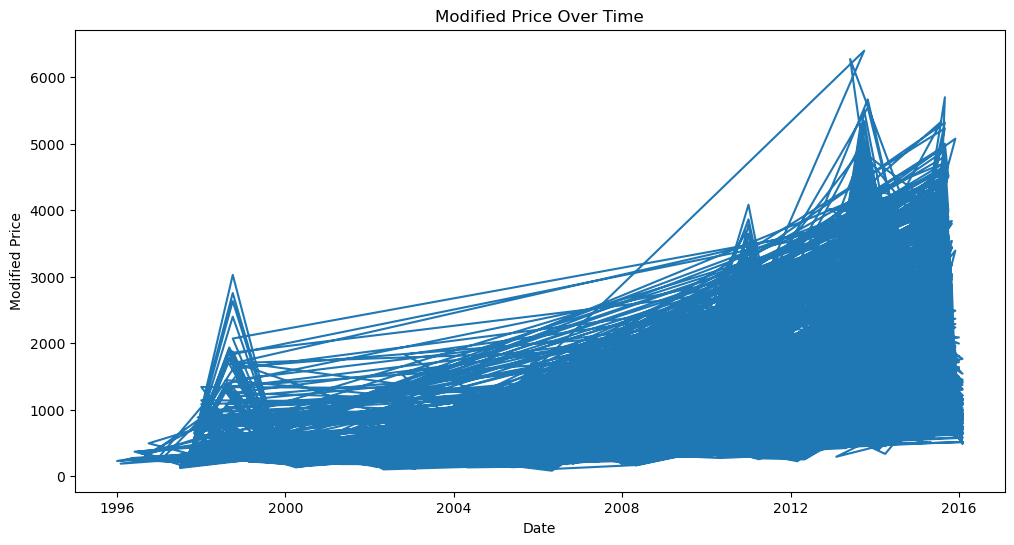

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for priceMod over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['priceMod'])
plt.xlabel('Date')
plt.ylabel('Modified Price')
plt.title('Modified Price Over Time')
plt.show()


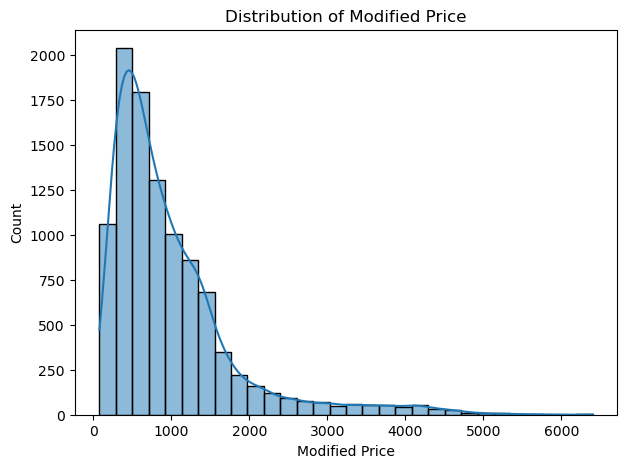

In [9]:
import warnings
warnings.filterwarnings("ignore")


# Histogram for priceMod
plt.figure(figsize=(7, 5))
sns.histplot(data['priceMod'], bins=30, kde=True)
plt.xlabel('Modified Price')
plt.title('Distribution of Modified Price')
plt.show()

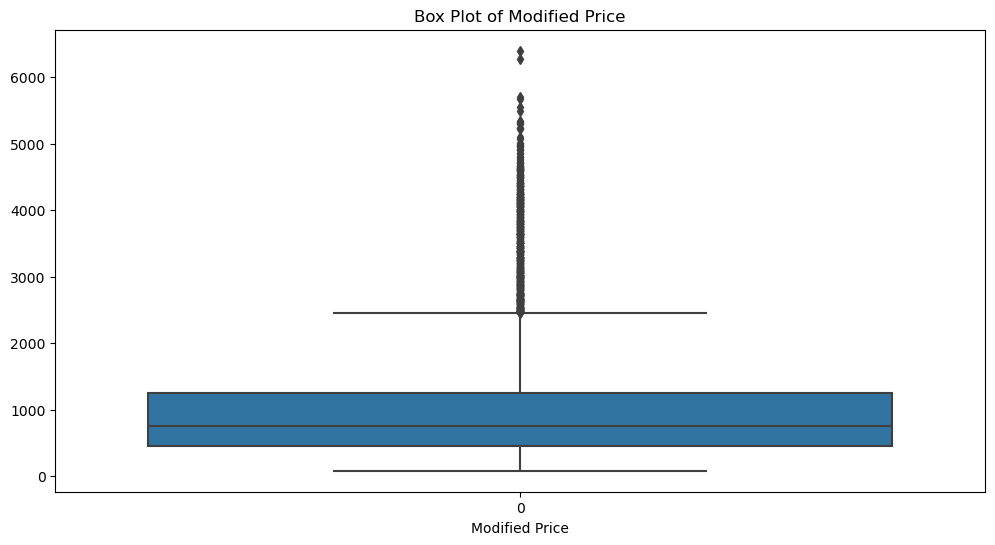

In [10]:
# Box plot for priceMod
plt.figure(figsize=(12, 6))
sns.boxplot(data['priceMod'])
plt.xlabel('Modified Price')
plt.title('Box Plot of Modified Price')
plt.show()


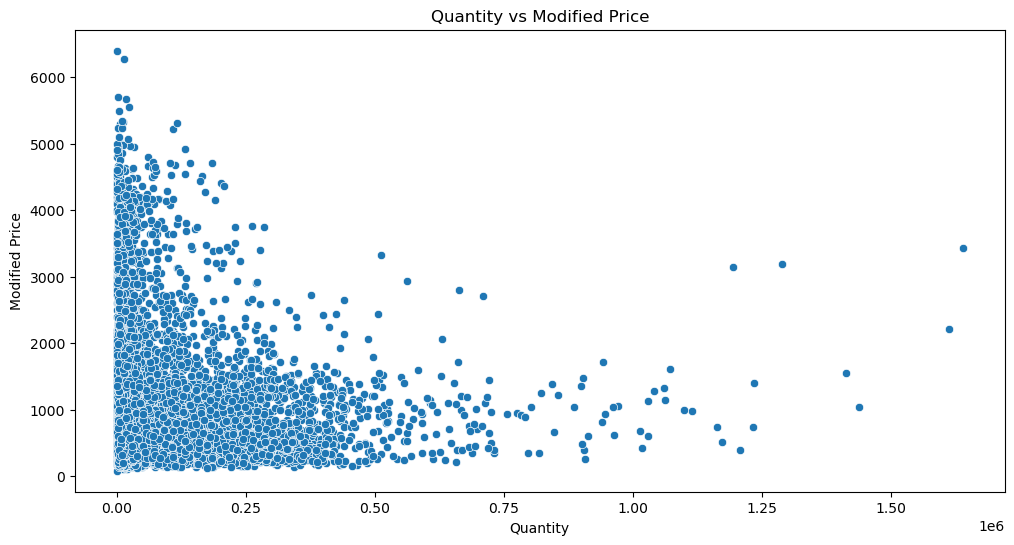

In [11]:
# Scatter plot of quantity vs priceMod
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['quantity'], y=data['priceMod'])
plt.xlabel('Quantity')
plt.ylabel('Modified Price')
plt.title('Quantity vs Modified Price')
plt.show()

In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


year              0
quantity          0
priceMin          0
priceMax          0
priceMod          0
market_encoded    0
state_encoded     0
city_encoded      0
month_encoded     0
dtype: int64


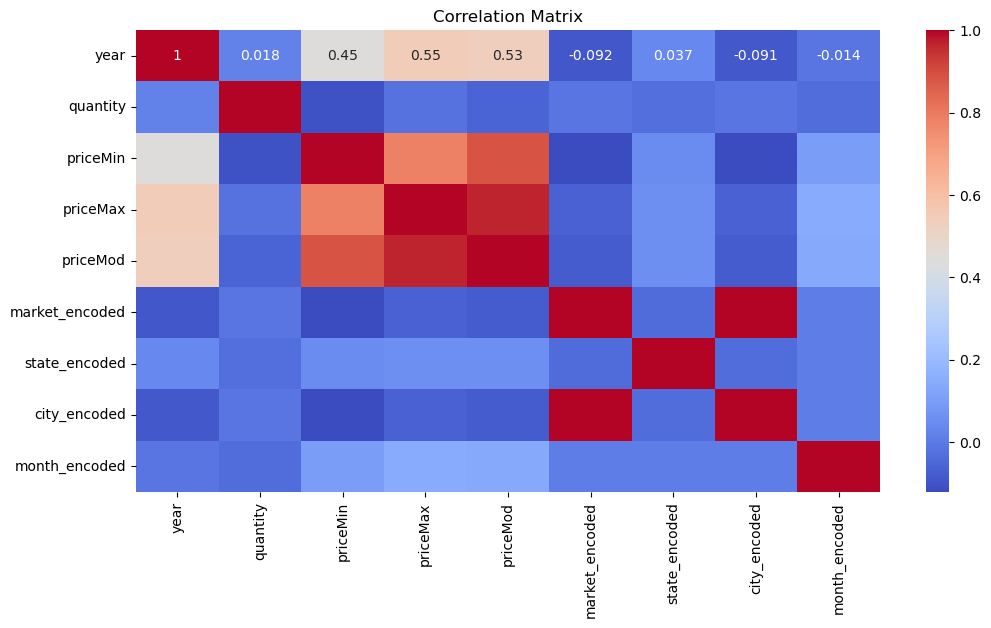

In [13]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [14]:
# Example: Create lagged features for priceMod
for lag in range(1, 13):  # creating lagged features for the past 12 months
    data[f'lag_{lag}'] = data['priceMod'].shift(lag)


In [15]:
# Drop rows with NaN values generated by the lagging process
data = data.dropna()
data

,year,quantity,priceMin,priceMax,priceMod,market_encoded,state_encoded,city_encoded,month_encoded,lag_1,...,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
date,,,,,,,,,,,,,,,,,,,,,
2012-02-01,2012,675,510,650,570,0,16,0,3,1125.0,...,380.0,324.0,1613.0,1256.0,1605.0,605.0,3433.0,1460.0,563.0,446.0
2013-02-01,2013,845,1400,1843,1629,0,16,0,3,570.0,...,1322.0,380.0,324.0,1613.0,1256.0,1605.0,605.0,3433.0,1460.0,563.0
2014-02-01,2014,1115,831,1163,983,0,16,0,3,1629.0,...,1125.0,1322.0,380.0,324.0,1613.0,1256.0,1605.0,605.0,3433.0,1460.0
2015-02-01,2015,1115,1200,1946,1688,0,16,0,3,983.0,...,570.0,1125.0,1322.0,380.0,324.0,1613.0,1256.0,1605.0,605.0,3433.0
2005-03-01,2005,900,281,357,322,0,16,0,7,1688.0,...,1629.0,570.0,1125.0,1322.0,380.0,324.0,1613.0,1256.0,1605.0,605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-01,2011,131326,282,612,526,119,14,116,2,1830.0,...,969.0,388.0,577.0,432.0,276.0,1996.0,1339.0,2096.0,884.0,603.0
2012-12-01,2012,207066,485,1327,1136,119,14,116,2,526.0,...,1018.0,969.0,388.0,577.0,432.0,276.0,1996.0,1339.0,2096.0,884.0
2013-12-01,2013,215883,472,1427,1177,119,14,116,2,1136.0,...,1830.0,1018.0,969.0,388.0,577.0,432.0,276.0,1996.0,1339.0,2096.0


In [16]:
# Reset index if necessary
data = data.reset_index(drop=True)
data

,year,quantity,priceMin,priceMax,priceMod,market_encoded,state_encoded,city_encoded,month_encoded,lag_1,...,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2012,675,510,650,570,0,16,0,3,1125.0,...,380.0,324.0,1613.0,1256.0,1605.0,605.0,3433.0,1460.0,563.0,446.0
1,2013,845,1400,1843,1629,0,16,0,3,570.0,...,1322.0,380.0,324.0,1613.0,1256.0,1605.0,605.0,3433.0,1460.0,563.0
2,2014,1115,831,1163,983,0,16,0,3,1629.0,...,1125.0,1322.0,380.0,324.0,1613.0,1256.0,1605.0,605.0,3433.0,1460.0
3,2015,1115,1200,1946,1688,0,16,0,3,983.0,...,570.0,1125.0,1322.0,380.0,324.0,1613.0,1256.0,1605.0,605.0,3433.0
4,2005,900,281,357,322,0,16,0,7,1688.0,...,1629.0,570.0,1125.0,1322.0,380.0,324.0,1613.0,1256.0,1605.0,605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,2011,131326,282,612,526,119,14,116,2,1830.0,...,969.0,388.0,577.0,432.0,276.0,1996.0,1339.0,2096.0,884.0,603.0
10211,2012,207066,485,1327,1136,119,14,116,2,526.0,...,1018.0,969.0,388.0,577.0,432.0,276.0,1996.0,1339.0,2096.0,884.0
10212,2013,215883,472,1427,1177,119,14,116,2,1136.0,...,1830.0,1018.0,969.0,388.0,577.0,432.0,276.0,1996.0,1339.0,2096.0
10213,2014,201077,446,1654,1456,119,14,116,2,1177.0,...,526.0,1830.0,1018.0,969.0,388.0,577.0,432.0,276.0,1996.0,1339.0


In [17]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
features = [f'lag_{i}' for i in range(1, 13)] + ['month_encoded', 'year']

features


['lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_7',
 'lag_8',
 'lag_9',
 'lag_10',
 'lag_11',
 'lag_12',
 'month_encoded',
 'year']

In [18]:
target = 'priceMod'

target

'priceMod'

In [19]:
# Split the data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [20]:
# Separate the features and target variable for training and testing
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [22]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Make predictions
y_pred = model.predict(X_test)

y_pred

array([ 886.48, 2293.97,  525.61, ..., 1338.31, 1312.53, 1193.93])

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [25]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 89867.86800709741
Root Mean Squared Error: 299.77969912436936


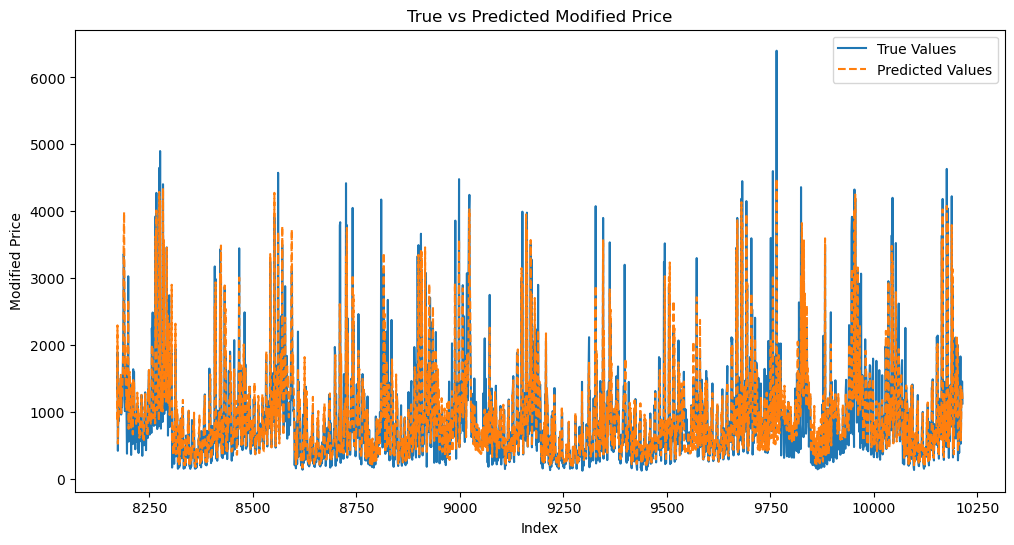

In [26]:
import matplotlib.pyplot as plt

# Plot the true vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='True Values')
plt.plot(test_data.index, y_pred, label='Predicted Values', linestyle='dashed')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Modified Price')
plt.title('True vs Predicted Modified Price')
plt.show()

In [27]:
# Feature importance
importances = model.feature_importances_
feature_names = features



In [28]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


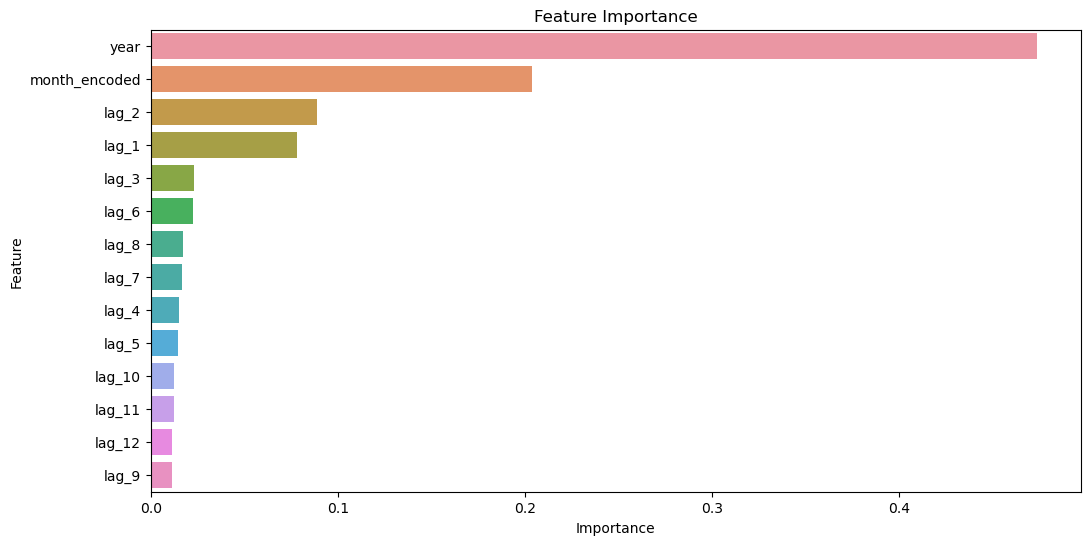

In [29]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


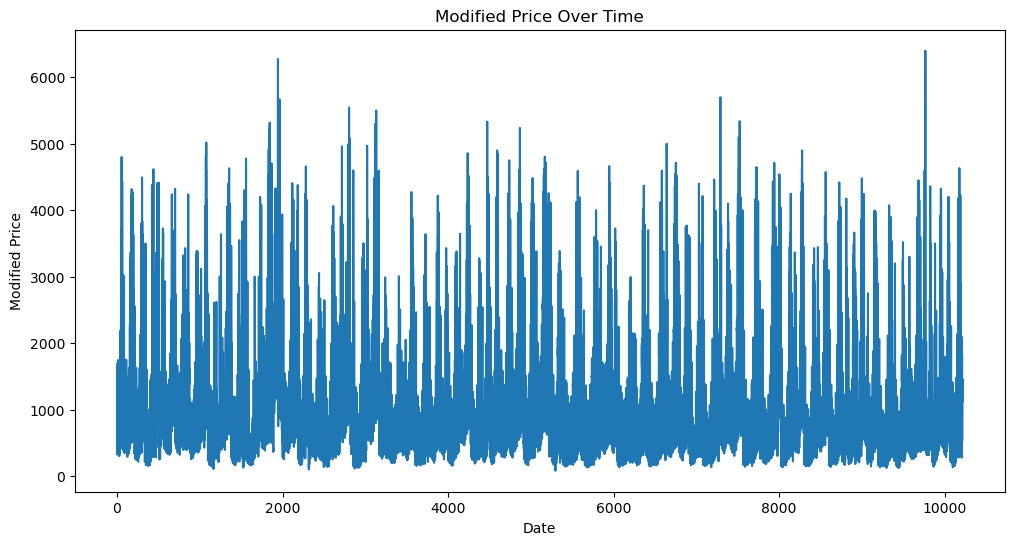

In [30]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['priceMod'])
plt.xlabel('Date')
plt.ylabel('Modified Price')
plt.title('Modified Price Over Time')
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(data['priceMod'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -12.066462657642187
p-value: 2.402380868074085e-22


In [32]:
# If the p-value is greater than 0.05, the series is non-stationary, and we need to difference it
if result[1] > 0.05:
    data['priceMod_diff'] = data['priceMod'].diff().dropna()

    # Re-run the ADF test on the differenced series
    result = adfuller(data['priceMod_diff'].dropna())
    print("f'ADF Statistic (differenced):" ,{result[0]})
    print("f'p-value (differenced):" ,{result[1]})
else:
    data['priceMod_diff'] = data['priceMod']
    
result

(-12.066462657642187,
 2.402380868074085e-22,
 38,
 10176,
 {'1%': -3.4309927820690547,
  '5%': -2.8618240719795316,
  '10%': -2.5669212063720193},
 161702.5866174832)

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(data['priceMod'], order=(5, 1, 0))  # Replace p, d, q with appropriate values



In [34]:
# Fit the model
model_fit = model.fit()

In [35]:
# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                10215
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -82031.424
Date:                Mon, 27 May 2024   AIC                         164074.848
Time:                        10:38:47   BIC                         164118.237
Sample:                             0   HQIC                        164089.520
                              - 10215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6633      0.008    -84.193      0.000      -0.679      -0.648
ar.L2         -0.2474      0.009    -28.577      0.000      -0.264      -0.230
ar.L3         -0.3089      0.009    -33.857      0.0

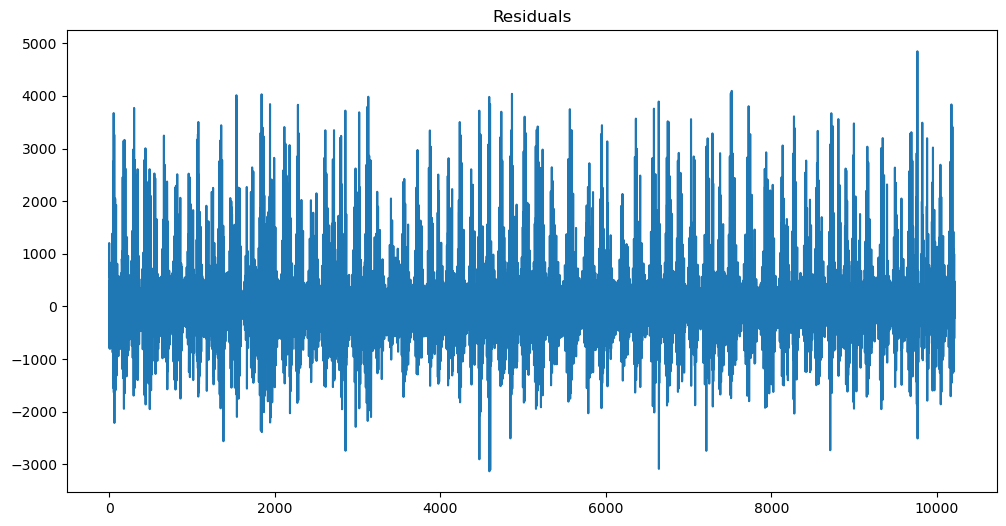

In [36]:
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()



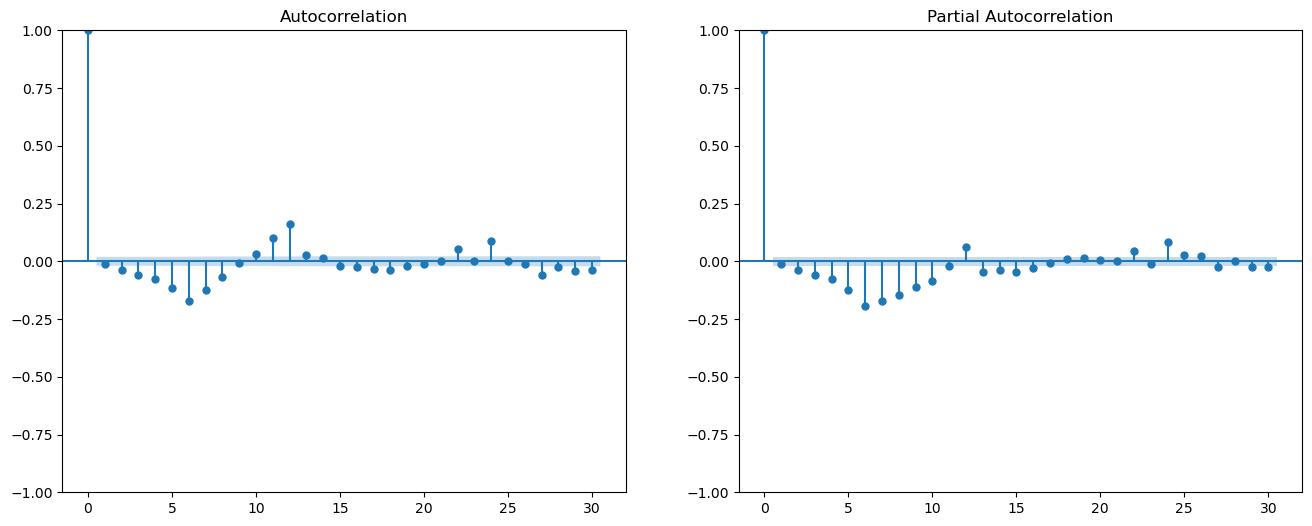

In [37]:
# Plot ACF and PACF of residuals
import statsmodels.api as sm
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sm.graphics.tsa.plot_acf(residuals, lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=30, ax=ax[1])
plt.show()


In [38]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(data['priceMod_diff'].dropna(), model_fit.fittedvalues, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 744.2119919738712


In [39]:
# Forecast future values
forecast_steps = 12  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)
forecast

10215    1279.435756
10216    1068.305158
10217    1182.969537
10218    1167.708623
10219    1219.063771
10220    1192.966376
10221    1200.177845
10222    1173.127725
10223    1184.363315
10224    1181.353529
10225    1190.738760
10226    1188.751900
Name: predicted_mean, dtype: float64

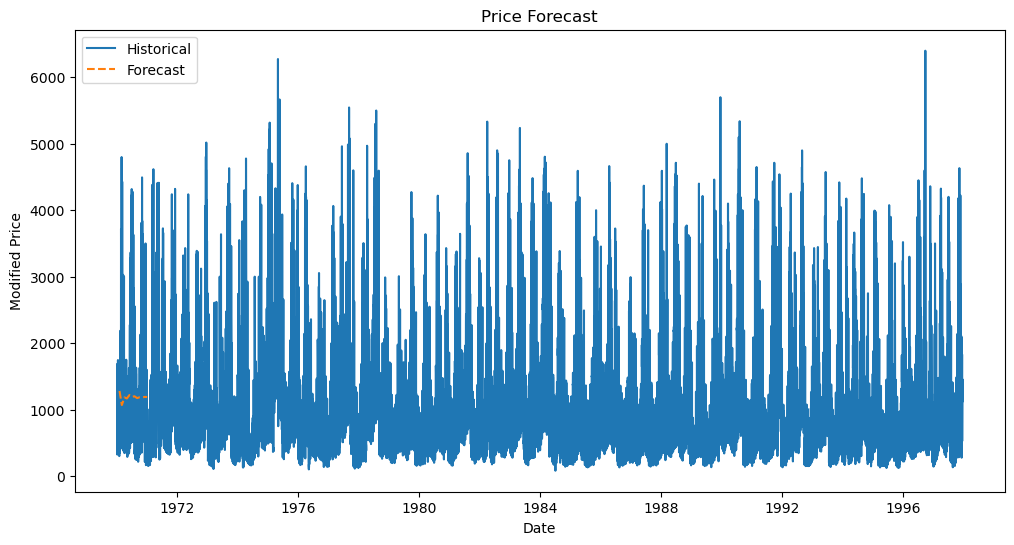

In [40]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['priceMod'], label='Historical')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Modified Price')
plt.title('Price Forecast')
plt.legend()
plt.show()
